<a href="https://colab.research.google.com/github/wasp33/ximen0703/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

````
tensorflow 2 = tensorflow + keras
!!! import keras -> import tensorflow.keras
````

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test)=load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

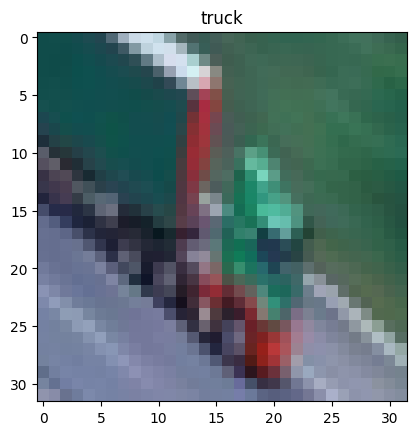

In [5]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 50
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])


In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


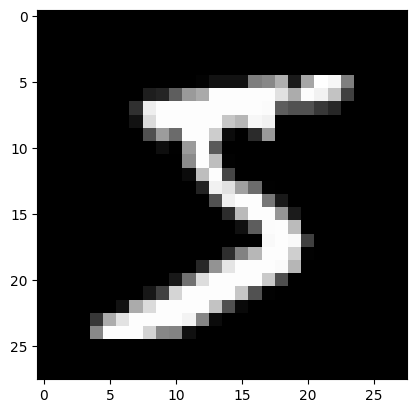

In [ ]:
# colormap cmap: summer,summer_r,gray,twilight
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap reverse: _r
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")

互斥: MNIST = softmax = $\frac {e^x}{\sum e^x} $

不互斥: 獅子,老虎,貓狗... => Sigmoid

微分: 連鎖法則

x->f(x)->2x

x->g(x)->x^2

x->f(x)->g(x)->y

$m= \frac{dx}{dx}=\frac{dm}{dx}*\frac{dy}{dm}$
整體微分=每一段相乘

sigmoid 斜率的最大值是0.25 $y=\frac{1}{1+e^-x}$

In [ ]:
# 地基: Model(Sequential/Model)
# 樓層: Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 100480 = 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 1290 = 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
    #Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


y 總共有十個答案

In [ ]:
# (X)輸出只有一個神經元: binary cross entropy
# q1: p1log(1/q1) + (1-p1)log(1/1-q1)
# n個神經元: categorical cross entropy
# p1log1/q1 + p2log1/q2 + ...
#model.compile(loss="mse",metrics="accuracy")

from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"])

在tensorflow中要調整隨機係數輸入時,-1到1 或0到1就可以了, 視函式庫的預設而定

與距離相關的迴歸就要做SCALING, 因為不是完全隨機的

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#demo
import numpy as np
n=np.array([
    [1,2,3],
    [4,5,6]
])

In [ ]:
n.reshape(6,-1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
x_train_norm= x_train.reshape(-1,784)/255.0
x_test_norm= x_test.reshape(-1,784)/255.0
print(x_train.shape)
print(x_train_norm.shape)

(60000, 28, 28)
(60000, 784)


要做fit

深度學習一定要有答案

6萬筆資料不止學一次

batch_size = 20(圖片大或資料少) 200(圖片小或資料多)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [ ]:
#60000/ 200 = 300(梯度下降)
model.fit(x_train_norm,
     y_train_cat,
    batch_size=200,
    epochs=100,
    validation_split=0.1,
          callbacks=c)

Epoch 1/100
270/270 [==============================] - 3s 8ms/step - loss: 0.4055 - accuracy: 0.8905 - val_loss: 0.1963 - val_accuracy: 0.9473
Epoch 2/100
270/270 [==============================] - 1s 4ms/step - loss: 0.1966 - accuracy: 0.9436 - val_loss: 0.1330 - val_accuracy: 0.9645
Epoch 3/100
270/270 [==============================] - 1s 4ms/step - loss: 0.1436 - accuracy: 0.9592 - val_loss: 0.1127 - val_accuracy: 0.9678
Epoch 4/100
270/270 [==============================] - 1s 5ms/step - loss: 0.1130 - accuracy: 0.9675 - val_loss: 0.1017 - val_accuracy: 0.9728
Epoch 5/100
270/270 [==============================] - 2s 6ms/step - loss: 0.0930 - accuracy: 0.9730 - val_loss: 0.0906 - val_accuracy: 0.9748
Epoch 6/100
270/270 [==============================] - 1s 4ms/step - loss: 0.0779 - accuracy: 0.9775 - val_loss: 0.0820 - val_accuracy: 0.9785
Epoch 7/100
270/270 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9807 - val_loss: 0.0811 - val_accuracy: 0.9773

In [ ]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9800


[0.0710873007774353, 0.9800000190734863]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(pre)".format(i) for i in range(10)],
      index=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 0s 1ms/step


,0(pre),1(pre),2(pre),3(pre),4(pre),5(pre),6(pre),7(pre),8(pre),9(pre)
0(true),971,0,1,2,1,1,2,1,1,0
1(true),0,1122,1,1,0,0,2,1,8,0
2(true),4,2,1006,4,1,0,2,5,7,1
3(true),0,0,3,992,0,4,0,4,4,3
4(true),1,0,1,1,957,0,4,2,2,14
5(true),3,1,0,5,1,871,5,1,4,1
6(true),4,2,1,1,1,5,941,3,0,0
7(true),0,2,8,3,0,0,0,1005,3,7
8(true),4,0,1,5,5,2,2,2,951,2
9(true),1,2,0,3,8,4,0,4,3,984


In [ ]:
# demo
# 不帶參數: 一維
# axis=0/1
n = np.array([
    [1, 2],
    [5, 6],
    [4, 3]
])
n.argmax(axis=-1)

array([1, 1, 0])

In [ ]:
# demo:
# l = []
# for i in range(3):
#     l.append(i ** 2)
l = [i ** 2 for i in range(3)]
l

[0, 1, 4]

多張圖畫成一張圖: Subplot


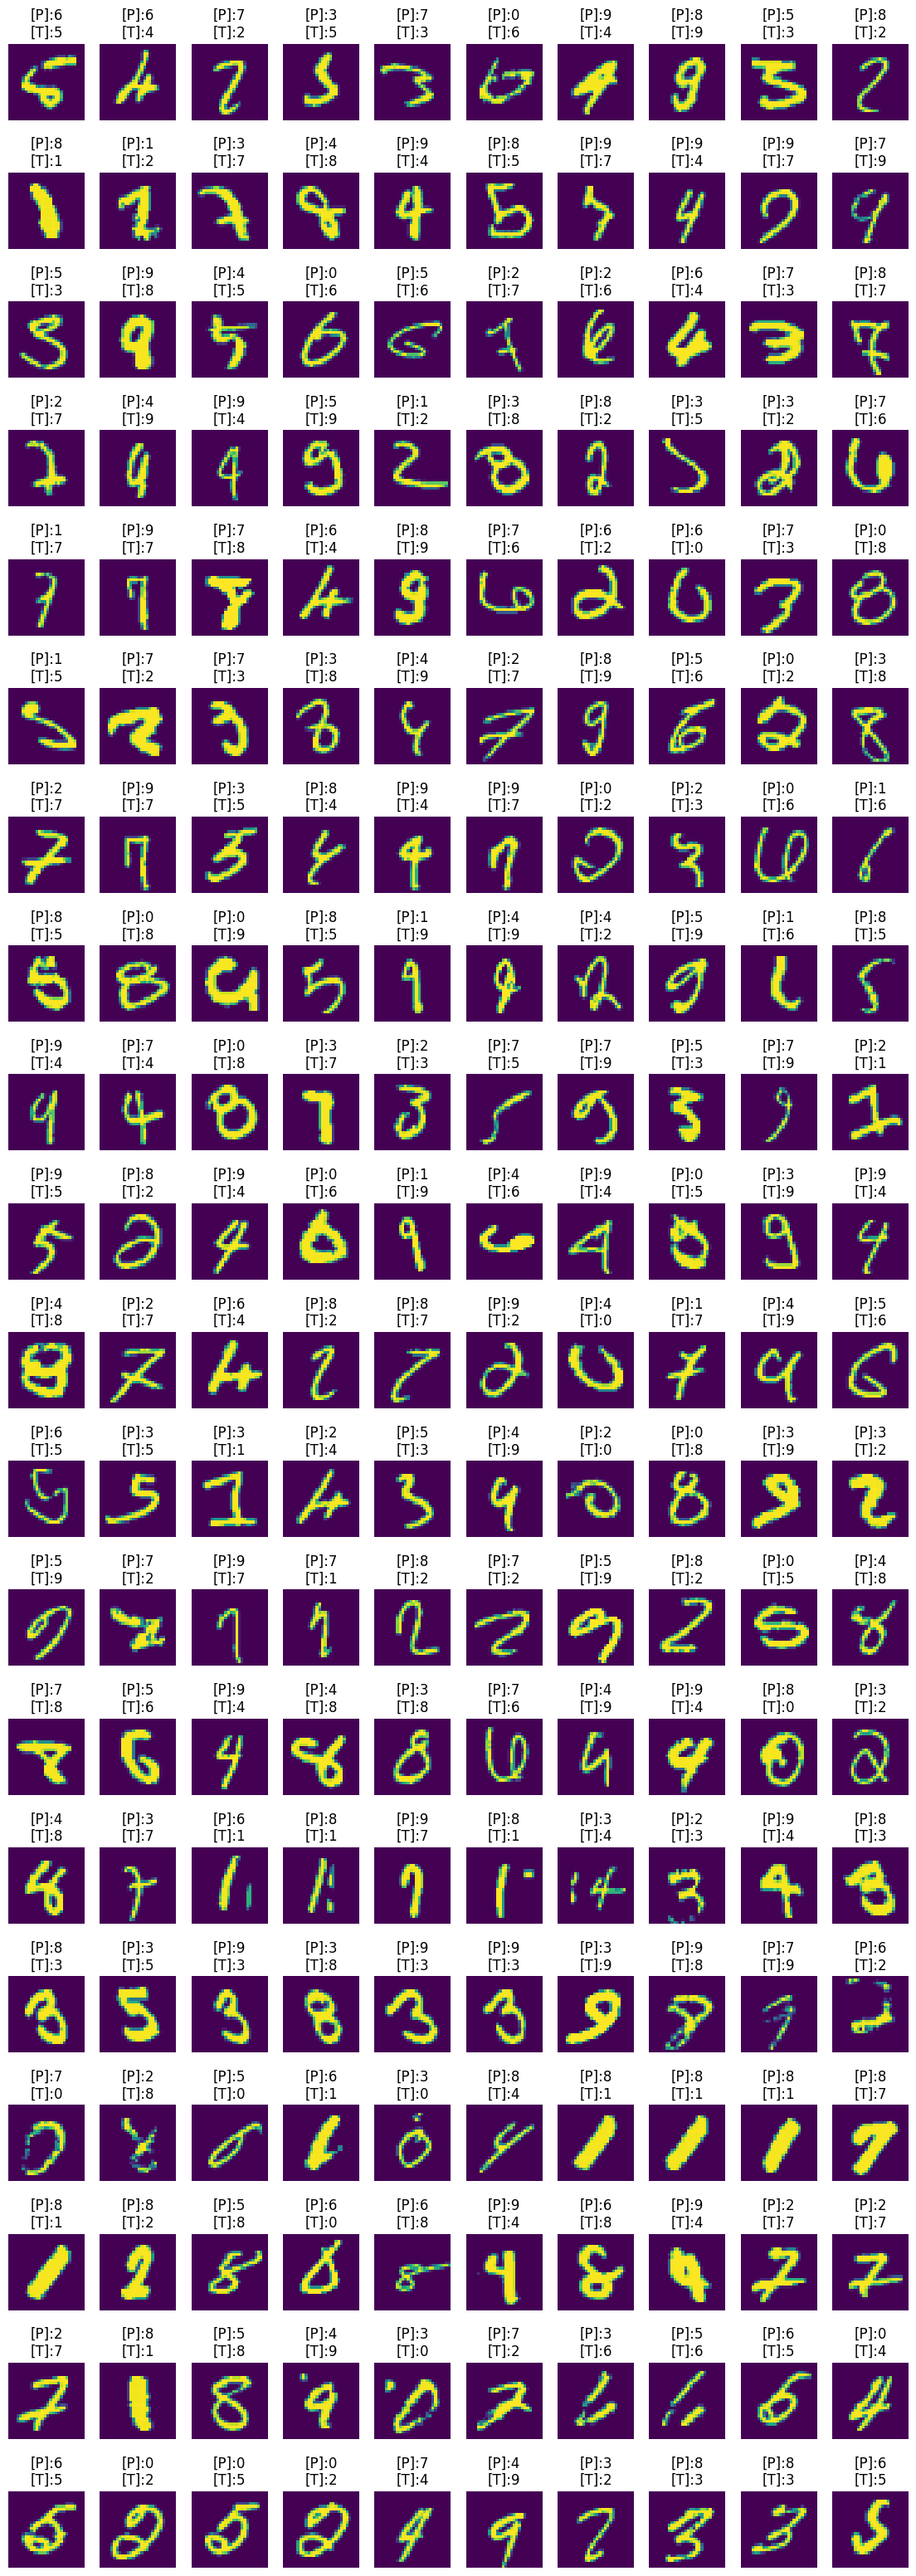

In [ ]:
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    # 總高/總寬/ith
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(t)
    plt.imshow(false_img[i])
    plt.axis("off")

In [ ]:
#demo
np.nonzero([
    [1,0,],
    [0,2],
    [3,0]
])

(array([0, 1, 2]), array([0, 1, 0]))